# Business Objective:  
Generate the features from the dataset and use them to recommend the books accordingly to the users.


### Load required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data set "Books".

In [2]:
books=pd.read_csv('books.csv')
books.head(15)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21100\298032551.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


# EDA of Book

### Book data Information:

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### Null Values present in BOOK dataset.

In [4]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

### Lets change the columns names .

In [5]:
books.rename({'Book-Title':'Title','Book-Author':'Author','Year-Of-Publication':'Year_of_publication','Image-URL-S': 'Image_URL_S', 'Image-URL-M': 'Image_URL_M','Image-URL-L':'Image_URL_L'},axis=1,inplace=True)

In [6]:
books.head(5)

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### No of Unique values .

In [7]:
print('shape of the books dataset:',books.shape)
print('no of unique books on dataset:',len(books['Title'].unique()))
print('no of unique books Author:',len(books['Author'].unique()))
print('no of unique books publisher:',len(books['Publisher'].unique()))

shape of the books dataset: (271360, 8)
no of unique books on dataset: 242135
no of unique books Author: 102024
no of unique books publisher: 16808


### Dropping null values from books 

In [8]:
books.dropna(inplace=True)

In [9]:
pd.to_numeric(books['Year_of_publication'])

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271355    1988
271356    1991
271357    2004
271358    1996
271359    2000
Name: Year_of_publication, Length: 271354, dtype: int64

In [10]:
books[['Year_of_publication']]=books[['Year_of_publication']].apply(pd.to_numeric)

##  Outliers In Year Of Publication .

In [11]:
x=books[(books['Year_of_publication']>2022) | (books['Year_of_publication']==0)].index
x


Int64Index([   176,    188,    288,    351,    542,    641,    646,    728,
               732,    735,
            ...
            270484, 270524, 270637, 270679, 270777, 270794, 270913, 271094,
            271182, 271196],
           dtype='int64', length=4631)

* We can see here that the Year of Publication for some books is greater than 2022 which is not possible.
* we will also drop the data where year of publication given as 0.

In [12]:
# drop that columns having published year more than 2022
books.drop(x,inplace=True)

In [13]:
books[(books['Year_of_publication']>2022) | (books['Year_of_publication']==0)].index

Int64Index([], dtype='int64')

In [14]:
books

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [15]:
#checking for duplicates
books['ISBN'].duplicated().sum()

0

# Visualization "Books"

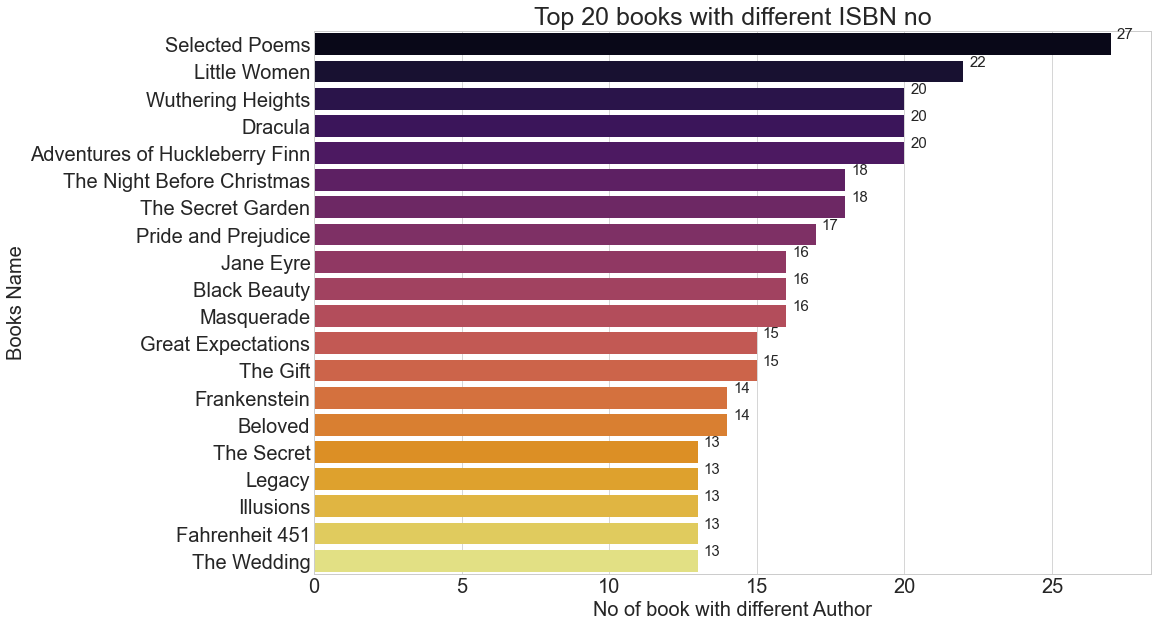

In [16]:
# count of duplicated ISBN
book_with_diff_author=books.groupby('Title').count()['ISBN'].reset_index().sort_values('ISBN',ascending=False).head(20)
book_with_diff_author

plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Title',x='ISBN',data=book_with_diff_author,palette='inferno')
plt.xlabel('No of book with different Author',fontsize=20)
plt.ylabel('Books Name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 20 books with different ISBN no',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

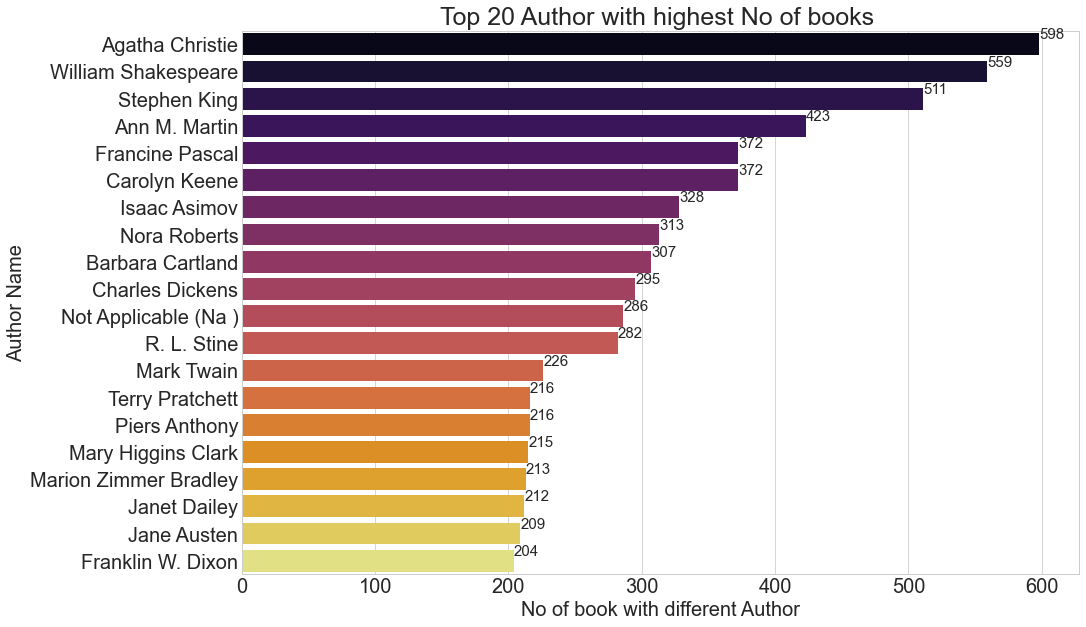

In [17]:
# Author with highest book 
book_with_diff_author=books.groupby('Author').count()['Title'].reset_index().sort_values('Title',ascending=False).head(20)
book_with_diff_author

plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Author',x='Title',data=book_with_diff_author,palette='inferno')
plt.xlabel('No of book with different Author',fontsize=20)
plt.ylabel('Author Name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 20 Author with highest No of books ',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

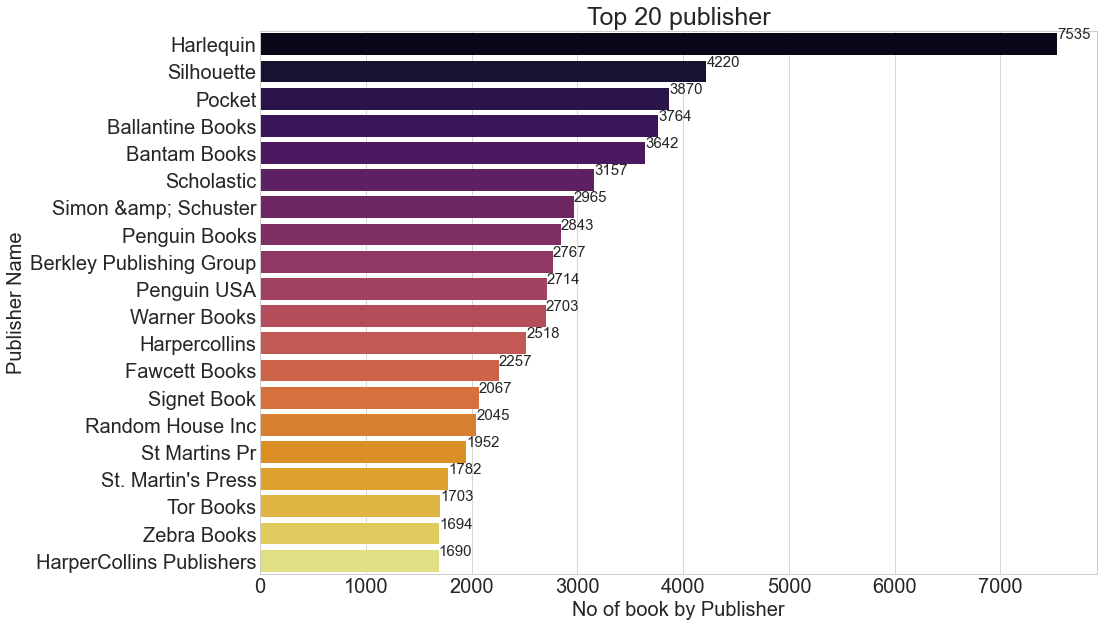

In [18]:
# Count of same book with different ISBN N0
no_of_book_by_Publisher=books.groupby('Publisher').count()['ISBN'].reset_index().sort_values('ISBN',ascending=False).head(20)
no_of_book_by_Publisher.drop_duplicates()

plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Publisher',x='ISBN',data=no_of_book_by_Publisher,palette='inferno')
plt.xlabel('No of book by Publisher',fontsize=20)
plt.ylabel('Publisher Name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 20 publisher',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

In [19]:
#  Author having same Book Title have different ISBN No 
no_of_book_by_Publisher=books.groupby(['Author','Title']).count()['ISBN'].reset_index().sort_values('ISBN',ascending=False).head(20)
no_of_book_by_Publisher.drop_duplicates()

,Author,Title,ISBN
158703,Mark Twain,Adventures of Huckleberry Finn,20
68300,Emily Bronte,Wuthering Heights,19
148205,Louisa May Alcott,Little Women,19
104690,Jane Austen,Pride and Prejudice,17
26220,Bram Stoker,Dracula,16
74245,Frances Hodgson Burnett,The Secret Garden,14
11635,Anna Sewell,Black Beauty,14
37220,Charlotte Bronte,Jane Eyre,14
35868,Charles Dickens,Great Expectations,14
162557,Mary Wollstonecraft Shelley,Frankenstein,12


## Loading the another dataset "users"

In [20]:
users=pd.read_csv('users.csv')
users.tail(15)

,User-ID,Location,Age
278843,278844,"st. paul, minnesota, usa",28.0
278844,278845,"järvenpää, uusimaa, finland",NaN
278845,278846,"toronto, ontario, canada",23.0
278846,278847,"brooklyn, new york, usa",NaN
278847,278848,"köln, nordrhein-westfalen, germany",NaN
278848,278849,"georgetown, ontario, canada",23.0
278849,278850,"sergnano, lombardia, italy",NaN
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


### USER Dataset Information:

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [22]:
# Renaming the user-id column
users.rename({'User-ID':'User_ID'},axis= True,inplace=True)

In [23]:
users.head(5)

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [24]:
# checking for duplicated values
users.duplicated().sum()

0

### Finding the Null value in User Dataset:

In [25]:
# checking for null values
users.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

### Describe the User dataset:

In [26]:
users.describe()

,User_ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Plotting the histogram for Age Columns:

<AxesSubplot:xlabel='Age', ylabel='Count'>

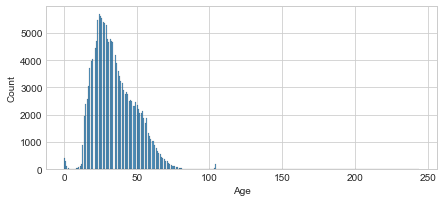

In [27]:
plt.figure(figsize=(7,3))
sns.histplot(x='Age',data=users)

### Plotting the Box plot to check the outliers in Age Column:

<AxesSubplot:>

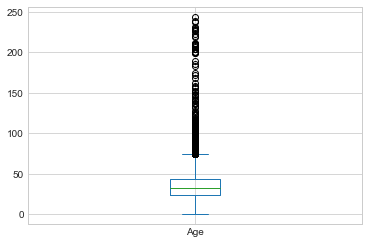

In [28]:
# checking for outlier using boxplot
users['Age'].plot(kind='box')

In [29]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

* here we can see the age values are more than 100 as this is unrealistic data

## Outlier:
* in obove data is it is observed that around 366 users having age is more than 100 year.
* imputing the age as 80 having age is more than 100



In [30]:
# imputing the age is greater than 100 to 80 
users.loc[users["Age"]>100,"Age"]=80

### Making the category for age 

In [31]:
age=[]
for values in users['Age']:
    if values < 10:
        age.append('below 10')
    elif values >= 10 and values <20:
        age.append('10 to 20')
    elif values >= 20  and values < 30 :
        age.append('20 to 30')
    elif values >=30 and values < 40:
        age.append('30 to 40')
    elif values >=40 and values < 50:
        age.append('40 to 50')
    elif values >=50 and values < 60:
        age.append('50 to 60')
    elif values >=60 and values < 70:
        age.append('60 to 70')
    elif values >=70 and values < 80:
        age.append('70 to 80') 
    elif values >=80 and values < 90:
        age.append('80 to 90')
    elif values >=90 and values < 100:
        age.append('90 to 100')
    elif values >=100 :
        age.append('above 100')    
    else:
        age.append(np.nan)
        
        
    
        
users['Age_category']=age       

 

In [32]:
users

,User_ID,Location,Age,Age_category
0,1,"nyc, new york, usa",NaN,NaN
1,2,"stockton, california, usa",18.0,10 to 20
2,3,"moscow, yukon territory, russia",NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,10 to 20
4,5,"farnborough, hants, united kingdom",NaN,NaN
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,NaN
278854,278855,"tacoma, washington, united kingdom",50.0,50 to 60
278855,278856,"brampton, ontario, canada",NaN,NaN
278856,278857,"knoxville, tennessee, usa",NaN,NaN


In [33]:
age_category_count=users.groupby('Age_category').count().reset_index()
age_category_count


,Age_category,User_ID,Location,Age
0,10 to 20,18894,18894,18894
1,20 to 30,51539,51539,51539
2,30 to 40,41889,41889,41889
3,40 to 50,26700,26700,26700
4,50 to 60,18811,18811,18811
5,60 to 70,6916,6916,6916
6,70 to 80,1644,1644,1644
7,80 to 90,565,565,565
8,90 to 100,62,62,62
9,above 100,7,7,7


Text(0.5, 1.0, 'No of book read by Age category')

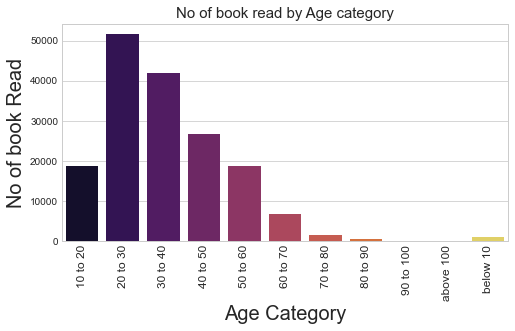

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x='Age_category',y='Age',data=age_category_count,palette='inferno')
plt.ylabel('No of book Read', fontsize=20)
plt.xlabel('Age Category', fontsize=20)
plt.xticks(fontsize=12,rotation='vertical')
plt.title('No of book read by Age category',fontsize=15)


In [35]:
users

,User_ID,Location,Age,Age_category
0,1,"nyc, new york, usa",NaN,NaN
1,2,"stockton, california, usa",18.0,10 to 20
2,3,"moscow, yukon territory, russia",NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,10 to 20
4,5,"farnborough, hants, united kingdom",NaN,NaN
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,NaN
278854,278855,"tacoma, washington, united kingdom",50.0,50 to 60
278855,278856,"brampton, ontario, canada",NaN,NaN
278856,278857,"knoxville, tennessee, usa",NaN,NaN


## Loading the dataset "Rating"

In [36]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Information about Rating Columns:

In [37]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Checking the null values in rating dataset

In [38]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [39]:
ratings.rename({'Book-Rating':'Rating','User-ID':'User_ID'},axis=1, inplace=True)

In [40]:
ratings.head()

,User_ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
ratings['Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [42]:
rating_count=ratings['Rating'].value_counts().values
rating_label=ratings['Rating'].value_counts().index

Text(0, 0.5, 'No of rating count')

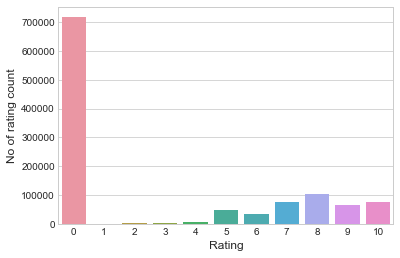

In [43]:
sns.barplot(x=rating_label,y=rating_count,data=ratings)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('No of rating count',fontsize=12)

## Merge the data set on common columns

In [44]:
# now we will merge the columns
# first we will merge rating with books finally we will merge it with users.
# merge the rating dataset with books on ISBN NO
data=pd.merge(left=books,right=ratings,on='ISBN',how='left')
data

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User_ID,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1018249,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1018250,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1018251,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1018252,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


## Master Dataset:

In [45]:
df=pd.merge(left=users, right=data, on='User_ID', how='left')
df

,User_ID,Location,Age,Age_category,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18.0,10 to 20,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,10 to 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205240,278854,"portland, oregon, usa",NaN,NaN,0425163393,Kat Scratch Fever (Kat Colorado Mysteries),Karen Kijewski,1998.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...,7.0
1205241,278855,"tacoma, washington, united kingdom",50.0,50 to 60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205242,278856,"brampton, ontario, canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205243,278857,"knoxville, tennessee, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for null values in Master dataset:

In [46]:
df.isnull().sum()

User_ID                     0
Location                    0
Age                    347347
Age_category           347347
ISBN                   188179
Title                  188179
Author                 188179
Year_of_publication    188179
Publisher              188179
Image_URL_S            188179
Image_URL_M            188179
Image_URL_L            188179
Rating                 188179
dtype: int64

In [47]:
# when we merge dataframe we got NaN values this is because for some user-id ISBN not present 
#we will drop this values on basis of ISBN
indexna=df[(df['ISBN'].isna())].index
indexna

Int64Index([      0,       2,       3,       4,       5,       6,      28,
                 30,      35,      45,
            ...
            1205137, 1205199, 1205201, 1205202, 1205207, 1205232, 1205241,
            1205242, 1205243, 1205244],
           dtype='int64', length=188179)

In [48]:
df.drop(indexna,inplace=True)

In [49]:
df

,User_ID,Location,Age,Age_category,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,10 to 20,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",NaN,NaN,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",NaN,NaN,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",NaN,NaN,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",NaN,NaN,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205236,278854,"portland, oregon, usa",NaN,NaN,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1205237,278854,"portland, oregon, usa",NaN,NaN,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1205238,278854,"portland, oregon, usa",NaN,NaN,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1205239,278854,"portland, oregon, usa",NaN,NaN,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


### After dropping the null values from the master dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017066 entries, 1 to 1205240
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1017066 non-null  int64  
 1   Location             1017066 non-null  object 
 2   Age                  742818 non-null   float64
 3   Age_category         742818 non-null   object 
 4   ISBN                 1017066 non-null  object 
 5   Title                1017066 non-null  object 
 6   Author               1017066 non-null  object 
 7   Year_of_publication  1017066 non-null  float64
 8   Publisher            1017066 non-null  object 
 9   Image_URL_S          1017066 non-null  object 
 10  Image_URL_M          1017066 non-null  object 
 11  Image_URL_L          1017066 non-null  object 
 12  Rating               1017066 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 108.6+ MB


In [51]:
df.corr()

,User_ID,Age,Year_of_publication,Rating
User_ID,1.000000,-0.008432,-0.009572,-0.043759
Age,-0.008432,1.000000,-0.016062,-0.023468
Year_of_publication,-0.009572,-0.016062,1.000000,0.038061
Rating,-0.043759,-0.023468,0.038061,1.000000


### "Visualization"

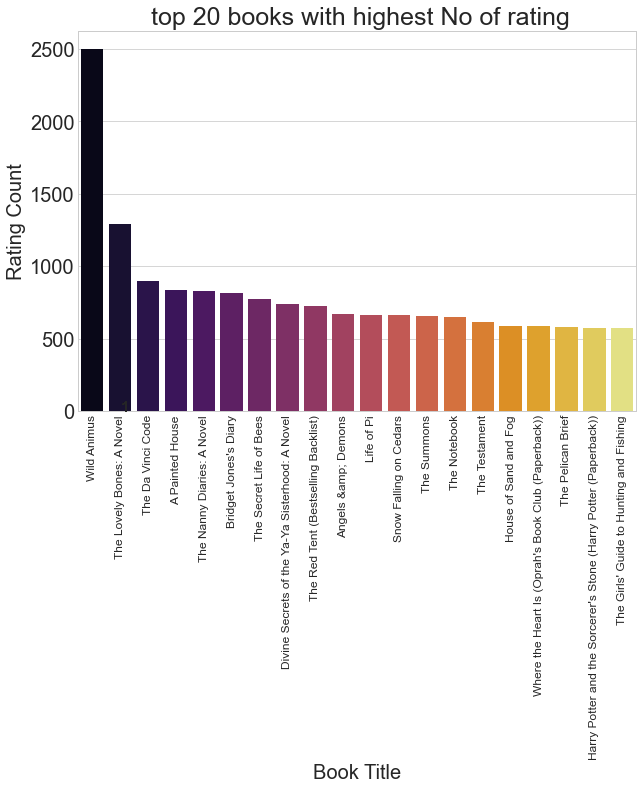

In [52]:
# top 20 books with highest No of book rating
rating_count=df.groupby('Title').count()['User_ID'].reset_index().sort_values(by='User_ID',ascending=False).head(20)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
ax=sns.barplot(x='Title',y='User_ID',data=rating_count,palette='inferno')
plt.ylabel('Rating Count',fontsize=20)
plt.xlabel('Book Title',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=12,rotation='vertical')
plt.title(' top 20 books with highest No of rating',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

In [53]:
Avg_rating=df.groupby(['Title']).mean()['Rating'].reset_index().sort_values('Rating',ascending=False)
Avg_rating

,Title,Rating
30035,California Lighthouses (Lighthouse Series (Old...,10.0
180679,The Darkening,10.0
102900,Le Morte Darthur,10.0
180687,The Darkest Part of the Woods,10.0
214021,They Came Like Swallows,10.0
...,...,...
142081,Psyche and Symbol,0.0
142080,Psyche and Matter (C. G. Jung Foundation Books),0.0
142079,Psyche Speaks: A Jungian Approach to Self and ...,0.0
142078,Psyche &amp; substance: Essays on homeopathy i...,0.0


### Checking  the Ave rating count for top rated books:

In [54]:
rating_count_b=df.groupby('Title').count()['User_ID'].reset_index().sort_values(by='User_ID',ascending=False)
rating_count_b

,Title,User_ID
231420,Wild Animus,2502
193167,The Lovely Bones: A Novel,1295
180449,The Da Vinci Code,897
5262,A Painted House,838
196075,The Nanny Diaries: A Novel,828
...,...,...
23422,Big Silver Space Shuttle,1
147879,River Gods and Spotted Devils,1
82281,"Hilfe, ich will hier raus. Ã?Â?berlebenstipps ...",1
82282,Hilflose Helfer.,1


In [55]:
aaa=rating_count_b.merge(Avg_rating,on='Title')
aaa.rename(columns={'Rating':'Avg_Rating'},inplace=True)
aaa

,Title,User_ID,Avg_Rating
0,Wild Animus,2502,1.019584
1,The Lovely Bones: A Novel,1295,4.468726
2,The Da Vinci Code,897,4.647715
3,A Painted House,838,3.231504
4,The Nanny Diaries: A Novel,828,3.530193
...,...,...,...
237443,Big Silver Space Shuttle,1,0.000000
237444,River Gods and Spotted Devils,1,0.000000
237445,"Hilfe, ich will hier raus. Ã?Â?berlebenstipps ...",1,0.000000
237446,Hilflose Helfer.,1,0.000000


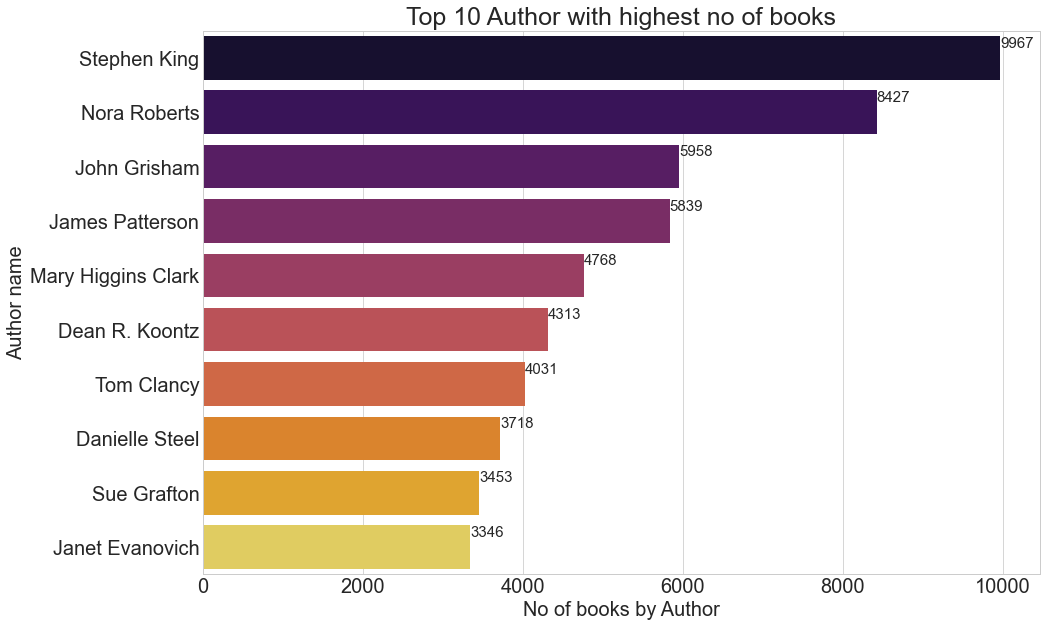

In [56]:
# no of rating count fot authors
Author_count=df.groupby('Author').count()['Rating'].reset_index().sort_values('Rating',ascending=False).head(10)
Author_count
plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Author',x='Rating',data=Author_count,palette='inferno')
plt.xlabel('No of books by Author',fontsize=20)
plt.ylabel('Author name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 10 Author with highest no of books',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

Text(0.5, 1.0, 'year with highest publication')

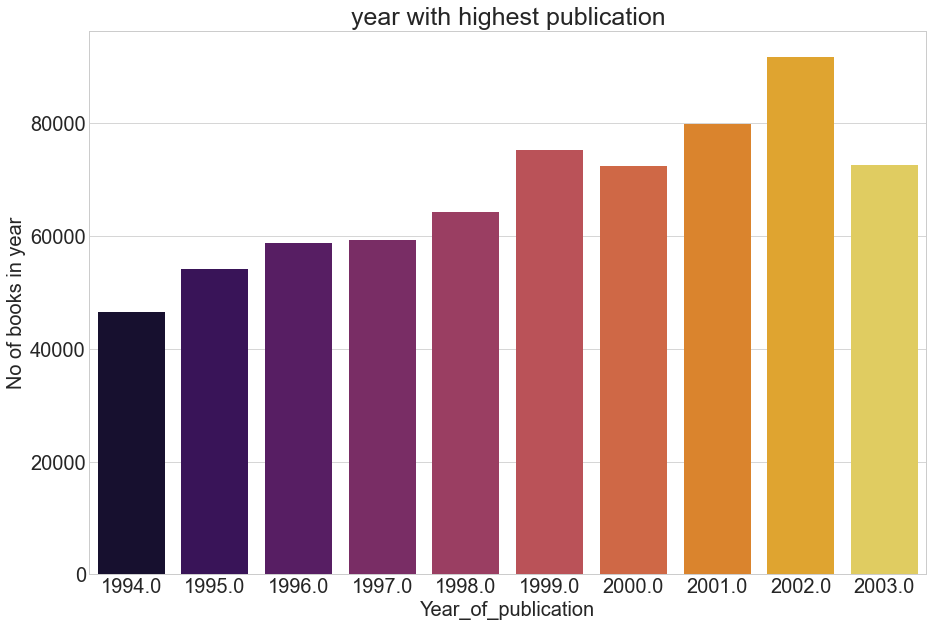

In [57]:
# In which year most book published
year=df.groupby('Year_of_publication').count()['Rating'].reset_index().sort_values("Rating",ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(x='Year_of_publication',y='Rating',data=year,palette='inferno')
plt.ylabel('No of books in year',fontsize=20)
plt.xlabel('Year_of_publication',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('year with highest publication',fontsize=25)

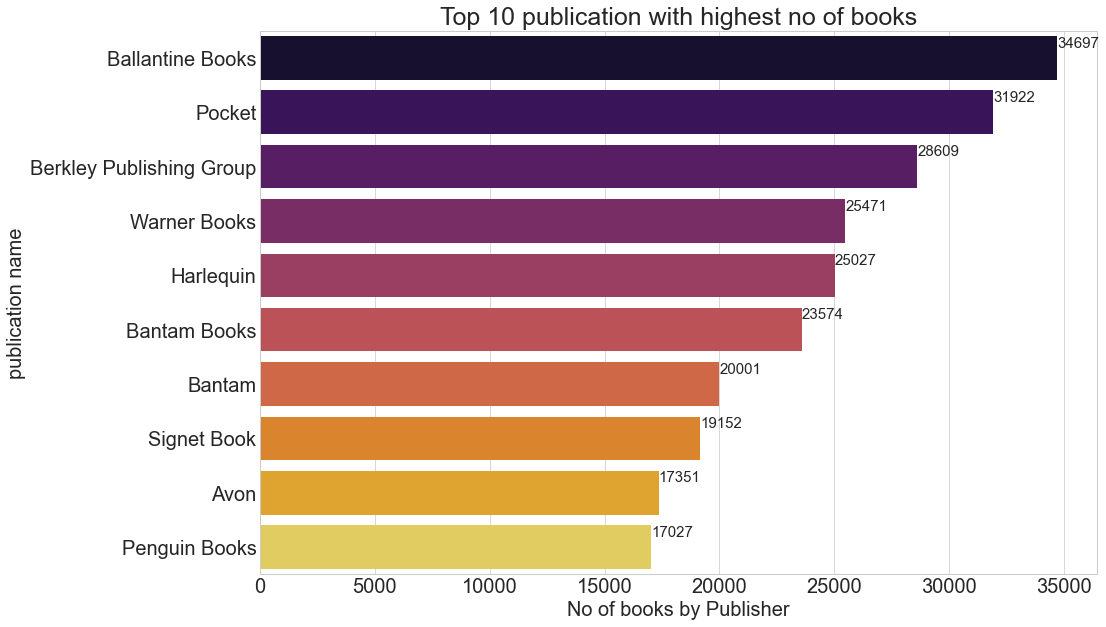

In [58]:
# pub;isher with highest book puplication
publication = df.groupby('Publisher').count()['Rating'].reset_index().sort_values('Rating',ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Publisher',x='Rating',data=publication,palette='inferno')
plt.xlabel('No of books by Publisher',fontsize=20)
plt.ylabel('publication name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 10 publication with highest no of books',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

# model based on age Category

In [59]:
Model_data=df
#Model_data.drop(Model_data.iloc[:,13:14],axis=1,inplace=True)
#Model_data.rename(columns={'User_ID_x':'User_ID'},inplace=True)
Model_data


,User_ID,Location,Age,Age_category,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,10 to 20,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",NaN,NaN,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",NaN,NaN,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",NaN,NaN,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",NaN,NaN,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205236,278854,"portland, oregon, usa",NaN,NaN,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1205237,278854,"portland, oregon, usa",NaN,NaN,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1205238,278854,"portland, oregon, usa",NaN,NaN,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1205239,278854,"portland, oregon, usa",NaN,NaN,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


In [60]:
# We will drop the 'age_category 'column from dataset
Model_data.drop(columns={'Age_category'},inplace=True)

In [61]:
# We will fill the values nan with median of age
Model_data['Age']=Model_data['Age'].fillna(Model_data['Age'].median())
Model_data


,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1205236,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1205237,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1205238,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1205239,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


In [62]:
Model_data

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1205236,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1205237,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1205238,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1205239,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


In [63]:
# now we will make function for categorcal feature of age
age=[]
for values in Model_data['Age']:
    if values < 15:
        age.append('Children')
    elif values >= 15 and values <25:
        age.append('Youth')
    elif values >= 25  and values < 66 :
        age.append("Adults")
    else:
        age.append('Seniors')
        
Model_data['Age_category']=age       


In [64]:
Model_data

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0,Adults
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0,Adults
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205236,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0,Adults
1205237,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0,Adults
1205238,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0,Adults
1205239,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0,Adults


In [65]:
Model_data1=Model_data.copy()
Model_data1

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0,Adults
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0,Adults
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205236,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0,Adults
1205237,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0,Adults
1205238,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0,Adults
1205239,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0,Adults


<AxesSubplot:xlabel='Age_category', ylabel='count'>

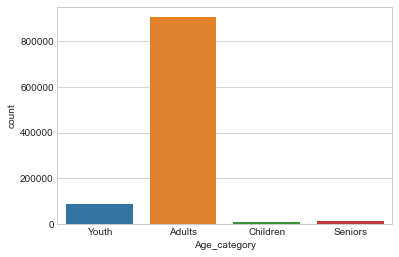

In [66]:
sns.countplot(data=Model_data, x='Age_category')

* as we have manupulated the values of age coulmn by imputing with median of age, we have got most users are from adult category
* second most age category peoples are from youth category 

In [67]:
# now we will sort the data by category
Children_data=Model_data1[Model_data1['Age_category']=="Children"]
Youth_data=Model_data1[Model_data1['Age_category']=="Youth"]
Adult_data=Model_data1[Model_data1['Age_category']=="Adults"]
Senior_data=Model_data1[Model_data1['Age_category']=="Seniors"]


# 1. Popular Books amoung the various age category:

## 1.1 books Popular amoung the children

In [68]:
C_Rating_count=Children_data.groupby('Title').count()['User_ID'].reset_index()
C_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [69]:
C_Avg_Rating=Children_data.groupby('Title').mean()['Rating'].reset_index()
C_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [70]:
Children=C_Rating_count.merge(C_Avg_Rating,on='Title')

In [71]:
final_children_data=Children.merge(Children_data,on='Title')
final_children_data

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,Final Fantasy Anthology: Official Strategy Gu...,1,10.0,30072,"st. louis, missouri, usa",11.0,1566869250,David Cassady,1999.0,BradyGames,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,10.0,Children
1,Pokemon: The Official Collector's Sticker Book,1,0.0,168464,"antioch, illinois, usa",11.0,0439106591,Maria S. Barbo,1999.0,Scholastic,http://images.amazon.com/images/P/0439106591.0...,http://images.amazon.com/images/P/0439106591.0...,http://images.amazon.com/images/P/0439106591.0...,0.0,Children
2,This Place Has No Atmosphere (Laurel-Leaf Books),1,0.0,256167,"temecula, california, usa",14.0,0440987261,Paula Danziger,1987.0,Random House Childrens Pub,http://images.amazon.com/images/P/0440987261.0...,http://images.amazon.com/images/P/0440987261.0...,http://images.amazon.com/images/P/0440987261.0...,0.0,Children
3,"'Mit Verlaub, Sie sind ein Arschloch.' Joschka...",1,8.0,84831,"stuttgart, baden-württemberg, germany",7.0,3203850273,Matthias Ohnsmann,2001.0,"Europa, Hamburg",http://images.amazon.com/images/P/3203850273.0...,http://images.amazon.com/images/P/3203850273.0...,http://images.amazon.com/images/P/3203850273.0...,8.0,Children
4,'N Sync: Tearing Up Our Hearts,1,0.0,252662,"san antonio, texas, usa",13.0,0312971982,Anna Louise Golden,1999.0,St. Martin's Press,http://images.amazon.com/images/P/0312971982.0...,http://images.amazon.com/images/P/0312971982.0...,http://images.amazon.com/images/P/0312971982.0...,0.0,Children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10374,"\One Foot in the Grave\"" (BBC)""",1,9.0,225232,"sydney, new south wales, australia",4.0,0140234985,David Renwick,1993.0,Penguin Books Ltd,http://images.amazon.com/images/P/0140234985.0...,http://images.amazon.com/images/P/0140234985.0...,http://images.amazon.com/images/P/0140234985.0...,9.0,Children
10375,"\The Happy Prince\"" and Other Stories (Penguin...",1,0.0,149327,"singapore, singapore, singapore",0.0,0140621377,Oscar Wilde,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/0140621377.0...,http://images.amazon.com/images/P/0140621377.0...,http://images.amazon.com/images/P/0140621377.0...,0.0,Children
10376,"\Who Was That Masked Man, Anyway?\""""",1,9.0,221614,"olympia, washington, usa",14.0,0380721139,Avi,1994.0,HarperTrophy,http://images.amazon.com/images/P/0380721139.0...,http://images.amazon.com/images/P/0380721139.0...,http://images.amazon.com/images/P/0380721139.0...,9.0,Children
10377,fÃ?Â¼nfter sein,1,10.0,96473,"tübingen, baden-württemberg, germany",4.0,340779195X,Ernst Jandl,2001.0,Beltz,http://images.amazon.com/images/P/340779195X.0...,http://images.amazon.com/images/P/340779195X.0...,http://images.amazon.com/images/P/340779195X.0...,10.0,Children


In [72]:
final_children_data['Rating_count'].unique()

array([ 1,  3,  2,  5,  4,  6,  9,  7, 10,  8, 17, 13, 12, 21, 11, 45],
      dtype=int64)

In [73]:
# we will consider only that books having atleast 5 rating count and average rating above 5
famous_C_books=final_children_data[(final_children_data['Avg_Rating']>=5) & (final_children_data['Rating_count']>=5) ].sort_values('Avg_Rating',ascending=False)
famous_C_books=famous_C_books.drop_duplicates('Title')

In [74]:
famous_C_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
2924,Gathering Blue (Readers Circle),6,8.833333,269556,"fort worth, texas, usa",14.0,0440229499,LOIS LOWRY,2002.0,Laurel Leaf,http://images.amazon.com/images/P/0440229499.0...,http://images.amazon.com/images/P/0440229499.0...,http://images.amazon.com/images/P/0440229499.0...,8.0,Children
3287,Harry Potter and the Prisoner of Azkaban (Book 3),13,8.769231,138220,"schertz, texas, usa",14.0,0439136369,J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,10.0,Children
7225,The Bad Beginning (A Series of Unfortunate Eve...,12,8.083333,18795,"waterloo, ontario, canada",14.0,0064407667,Lemony Snicket,1999.0,HarperCollins,http://images.amazon.com/images/P/0064407667.0...,http://images.amazon.com/images/P/0064407667.0...,http://images.amazon.com/images/P/0064407667.0...,10.0,Children
3303,Harry Potter and the Sorcerer's Stone (Book 1),7,8.000000,148185,"canton, georgia, usa",14.0,0590353403,J. K. Rowling,1998.0,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,10.0,Children
3249,Harry Potter and the Chamber of Secrets (Book 2),17,7.176471,108243,"canton, ga, usa",14.0,0439064864,J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,10.0,Children


In [75]:
famous_C_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
2924,Gathering Blue (Readers Circle),8.833333,6
3287,Harry Potter and the Prisoner of Azkaban (Book 3),8.769231,13
7225,The Bad Beginning (A Series of Unfortunate Eve...,8.083333,12
3303,Harry Potter and the Sorcerer's Stone (Book 1),8.000000,7
3249,Harry Potter and the Chamber of Secrets (Book 2),7.176471,17
3264,Harry Potter and the Goblet of Fire (Book 4),7.153846,13
6473,Shiloh (Yearling Newbery),7.000000,5
7208,The BFG,7.000000,7
1239,Captain Underpants and the Attack of the Talki...,7.000000,8
3322,Harry Potter and the Sorcerer's Stone (Harry P...,6.666667,21


In [76]:
import pickle

In [77]:
pickle.dump(famous_C_books,open('famous_C_books.pkl','wb'))

## 1.2 books Popular amoung the Youth:

In [78]:
Y_Rating_count=Youth_data.groupby('Title').count()['User_ID'].reset_index()
Y_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [79]:
Y_Avg_Rating=Youth_data.groupby('Title').mean()['Rating'].reset_index()
Y_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [80]:
Youth=Y_Rating_count.merge(Y_Avg_Rating,on='Title')

In [81]:
final_Youth_data=Youth.merge(Youth_data,on='Title')
final_Youth_data.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,A Light in the Storm: The Civil War Diary of ...,1,0.0,55927,"roscoe, minnesota, usa",17.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,0.0,Youth
1,Final Fantasy Anthology: Official Strategy Gu...,1,0.0,28523,"springfield, missouri, usa",24.0,1566869250,David Cassady,1999.0,BradyGames,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,0.0,Youth
2,Garfield Bigger and Better (Garfield (Numbere...,1,7.0,200323,"beebeetown, iowa, usa",19.0,0345407709,Jim Davis,1996.0,Ballantine Books,http://images.amazon.com/images/P/0345407709.0...,http://images.amazon.com/images/P/0345407709.0...,http://images.amazon.com/images/P/0345407709.0...,7.0,Youth
3,Goosebumps Monster Edition 1: Welcome to Dead...,1,8.0,212697,"santa rosa, california, usa",18.0,0590509950,R. L. Stine,1995.0,Scholastic Paperbacks (T),http://images.amazon.com/images/P/0590509950.0...,http://images.amazon.com/images/P/0590509950.0...,http://images.amazon.com/images/P/0590509950.0...,8.0,Youth
4,Harry Potter and the Bible: The Menace Behind...,1,0.0,173684,"chula vista, california, usa",15.0,0889652015,Richard Abanes,2001.0,Horizon Books Publishers,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,0.0,Youth


In [82]:
final_Youth_data['Rating_count'].unique()

array([  1,   4,   2,  13,   3,  70,   6,  30,   9,   8,  10,  21,   7,
        16,  12,  39,   5,  23,  37,  19,  32,  11,  14,  27,  41,  34,
        40,  64,  71,  26,  36,  15,  22,  35,  54,  57,  17,  28,  20,
        18,  52, 100,  44,  24,  45,  31,  65,  25,  50,  74,  29,  47,
        33,  95,  72,  73,  42,  94,  43,  82,  51,  49,  58,  68,  53,
       106,  83,  61,  56,  38,  59,  60, 127,  63,  67,  55, 465],
      dtype=int64)

In [83]:
# we will consider only that books having atleast 10 rating count and average rating above 5
famous_Y_books=final_Youth_data[(final_Youth_data['Avg_Rating']>=5) & (final_Youth_data['Rating_count']>=10) ].sort_values('Avg_Rating',ascending=False)
famous_Y_books=famous_Y_books.drop_duplicates('Title').head(25)

In [84]:
famous_Y_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
69396,The Giver (Readers Circle),11,8.000000,152206,"waxahachie, texas, usa",16.0,0440237688,LOIS LOWRY,2002.0,Laurel Leaf,http://images.amazon.com/images/P/0440237688.0...,http://images.amazon.com/images/P/0440237688.0...,http://images.amazon.com/images/P/0440237688.0...,10.0,Youth
21373,El Hobbit,14,7.928571,105840,"madrid, madrid, spain",19.0,8445071416,J. R. R. Tolkien,1991.0,Minotauro,http://images.amazon.com/images/P/8445071416.0...,http://images.amazon.com/images/P/8445071416.0...,http://images.amazon.com/images/P/8445071416.0...,7.0,Youth
57659,Simisola,18,7.888889,71804,"la puente, california, usa",17.0,0440222028,Ruth Rendell,1996.0,Dell,http://images.amazon.com/images/P/0440222028.0...,http://images.amazon.com/images/P/0440222028.0...,http://images.amazon.com/images/P/0440222028.0...,9.0,Youth
29577,Hatchet,11,7.818182,277835,"baton rouge, louisiana, usa",16.0,014032724X,Gary Paulsen,1988.0,Penguin USA,http://images.amazon.com/images/P/014032724X.0...,http://images.amazon.com/images/P/014032724X.0...,http://images.amazon.com/images/P/014032724X.0...,10.0,Youth
12950,Chobits (Chobits),18,7.666667,9227,"glendora, california, usa",24.0,1591821533,Clamp,2003.0,TokyoPop,http://images.amazon.com/images/P/1591821533.0...,http://images.amazon.com/images/P/1591821533.0...,http://images.amazon.com/images/P/1591821533.0...,0.0,Youth


In [85]:
famous_Y_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
69396,The Giver (Readers Circle),8.000000,11
21373,El Hobbit,7.928571,14
57659,Simisola,7.888889,18
29577,Hatchet,7.818182,11
12950,Chobits (Chobits),7.666667,18
70569,The Hobbit,7.600000,10
74621,The Other Boleyn Girl,7.272727,11
29350,Harry Potter and the Sorcerer's Stone (Book 1),7.119048,42
39428,Lirael: Daughter of the Clayr,7.090909,11
54227,Rosencrantz &amp; Guildenstern Are Dead,6.916667,12


In [86]:
pickle.dump(famous_Y_books,open('famous_Y_books.pkl','wb'))

## 1.3 books Popular amoung the Adult:

In [87]:
A_Rating_count=Adult_data.groupby('Title').count()['User_ID'].reset_index()
A_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [88]:
A_Avg_Rating=Adult_data.groupby('Title').mean()['Rating'].reset_index()
A_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [89]:
Adult=A_Rating_count.merge(A_Avg_Rating,on='Title')

In [90]:
final_Adult_data=Adult.merge(Adult_data,on='Title')
final_Adult_data.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,A Light in the Storm: The Civil War Diary of ...,3,3.0,18995,"atlanta, georgia, usa",35.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,0.0,Adults
1,A Light in the Storm: The Civil War Diary of ...,3,3.0,35859,"duluth, minnesota, usa",35.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,0.0,Adults
2,A Light in the Storm: The Civil War Diary of ...,3,3.0,96448,"albuquerque, new mexico, usa",35.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,9.0,Adults
3,Always Have Popsicles,1,0.0,172742,"astoria, oregon, usa",44.0,0964147726,Rebecca Harvin,1994.0,Rebecca L. Harvin,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...,0.0,Adults
4,Apple Magic (The Collector's series),1,0.0,198711,"little canada, minnesota, usa",62.0,0942320093,Martina Boudreau,1984.0,Amer Cooking Guild,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...,0.0,Adults


In [91]:
final_Adult_data['Rating_count'].unique()

array([   3,    1,    2,    9,    8,    4,   11,   13,    7,    5,   33,
          6,   10,   22,   55,   12,   20,   24,   61,   14,   18,  192,
        469,   78,   19,   66,   47,   21,   94,   16,  329,   39,   44,
         76,  134,   27,   26,   23,   59,   37,   28,   17,  124,  297,
         34,   30,  207,   15,   25,   45,  222,  145,   77,   38,  132,
         82,   50,  102,   35,  130,  110,   63,   31,   41,   46,  157,
         79,   90,   64,  270,  265,   70,  171,   29,   32,  101,   53,
         72,  114,  164,  295,   49,   57,  779,  142,   62,   52,   58,
         74,  370,   36,   48,   42,   91,   89,   56,   51,  121,  194,
        472,  152,  196,  299,  253,  118,  141,   43,  248,   97,  224,
        146,  105,   84,  131,  170,   54,  227,  174,  272,   85,  107,
         40,   67,   69,   88,   73,  286,  203,  154,  596,   75,  158,
        167,  111,   93,  136,   68,  209,  195,  215,   99,  166,   95,
        231,  240,  128,   92,  177,   71,  260,  1

In [92]:
# we will consider only that books having atleast 100 rating count and average rating above 5
famous_A_books=final_Adult_data[(final_Adult_data['Avg_Rating']>=5) & (final_Adult_data['Rating_count']>=50) ].sort_values('Avg_Rating',ascending=False)
famous_A_books=famous_A_books.drop_duplicates('Title')

In [93]:
famous_A_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
785048,The Stand (The Complete and Uncut Edition),53,6.301887,90417,"rye, new hampshire, usa",40.0,0385199570,Stephen King,1990.0,Doubleday Books,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...,0.0,Adults
281575,Griffin &amp; Sabine: An Extraordinary Corresp...,64,5.781250,102154,"salem, oregon, usa",35.0,0877017883,Nick Bantock,1991.0,Chronicle Books,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,10.0,Adults
529900,"Rich Dad, Poor Dad: What the Rich Teach Their ...",60,5.716667,223145,"manhattan, illinois, usa",45.0,0446677450,Robert T. Kiyosaki,2000.0,Warner Books,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,10.0,Adults
724538,The Little Prince,119,5.630252,238526,"charleston, south carolina, usa",35.0,0156528207,Antoine de Saint-ExupÃ©ry,1968.0,Harcourt,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,0.0,Adults
291104,Harry Potter and the Prisoner of Azkaban (Book 3),340,5.573529,52350,"lisboa, n/a, portugal",31.0,0439136350,J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,8.0,Adults


In [94]:
famous_A_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
785048,The Stand (The Complete and Uncut Edition),6.301887,53
281575,Griffin &amp; Sabine: An Extraordinary Corresp...,5.781250,64
529900,"Rich Dad, Poor Dad: What the Rich Teach Their ...",5.716667,60
724538,The Little Prince,5.630252,119
291104,Harry Potter and the Prisoner of Azkaban (Book 3),5.573529,340
290587,Harry Potter and the Goblet of Fire (Book 4),5.558528,299
703723,The Hobbit,5.507246,69
290945,Harry Potter and the Order of the Phoenix (Boo...,5.468992,258
291496,Harry Potter and the Sorcerer's Stone (Book 1),5.403509,228
349739,Jitterbug Perfume,5.400000,80


In [95]:
pickle.dump(famous_A_books,open('famous_A_books.pkl','wb'))

## 1.4 books Popular amoung the Senior

In [96]:
S_Rating_count=Senior_data.groupby('Title').count()['User_ID'].reset_index()
S_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [97]:
S_Avg_Rating=Senior_data.groupby('Title').mean()['Rating'].reset_index()
S_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [98]:
Senior=S_Rating_count.merge(S_Avg_Rating,on='Title')

In [99]:
final_Senior_data=Senior.merge(Senior_data,on='Title')
final_Senior_data.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,Earth Prayers From around the World: 365 Pray...,1,0.0,236840,"geneva, iowa, usa",72.0,006250746X,Elizabeth Roberts,1991.0,HarperSanFrancisco,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,0.0,Seniors
1,Good Wives: Image and Reality in the Lives of...,2,4.0,88652,"lanham, maryland, usa",83.0,0679732578,Laurel Thatcher Ulrich,1991.0,Vintage Books USA,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,0.0,Seniors
2,Good Wives: Image and Reality in the Lives of...,2,4.0,187284,"houston, texas, usa",74.0,0679732578,Laurel Thatcher Ulrich,1991.0,Vintage Books USA,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,8.0,Seniors
3,'Tis: A Memoir,2,4.0,62348,"media, pennsylvania, usa",67.0,0684864495,Frank McCourt,1999.0,Scribner,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,8.0,Seniors
4,'Tis: A Memoir,2,4.0,208429,"monrovia, california, usa",68.0,0684864495,Frank McCourt,1999.0,Scribner,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,0.0,Seniors


In [100]:
final_Senior_data['Rating_count'].unique()

array([ 1,  2,  4,  7,  5,  3, 15,  6,  9, 16,  8, 10, 11, 13, 25, 14, 12,
       17, 41], dtype=int64)

In [101]:
# we will consider only that books having atleast 5 rating count and average rating above 5
famous_S_books=final_Senior_data[(final_Senior_data['Avg_Rating']>=5) & (final_Senior_data['Rating_count']>=5) ].sort_values('Avg_Rating',ascending=False)
famous_S_books=famous_S_books.drop_duplicates('Title').head(25)

In [102]:
famous_S_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
11133,The Secret Life of Bees,7,7.428571,37255,"onalaska, washington, usa",66.0,0670894605,Sue Monk Kidd,2002.0,Viking Books,http://images.amazon.com/images/P/0670894605.0...,http://images.amazon.com/images/P/0670894605.0...,http://images.amazon.com/images/P/0670894605.0...,7.0,Seniors
7076,Peace Like a River,6,7.333333,55655,"wausau, wisconsin, usa",70.0,0802139256,Leif Enger,2002.0,Grove Press,http://images.amazon.com/images/P/0802139256.0...,http://images.amazon.com/images/P/0802139256.0...,http://images.amazon.com/images/P/0802139256.0...,9.0,Seniors
4910,Jackdaws,6,7.166667,266610,"anchorage, alaska, usa",68.0,0451207521,Ken Follett,2002.0,Signet Book,http://images.amazon.com/images/P/0451207521.0...,http://images.amazon.com/images/P/0451207521.0...,http://images.amazon.com/images/P/0451207521.0...,10.0,Seniors
11234,The Smoke Jumper,8,7.125000,62926,"el cajon, california, usa",66.0,0385334036,Nicholas Evans,2001.0,Delacorte Press,http://images.amazon.com/images/P/0385334036.0...,http://images.amazon.com/images/P/0385334036.0...,http://images.amazon.com/images/P/0385334036.0...,8.0,Seniors
11318,The Summons,17,7.058824,13273,"harrisburg, pennsylvania, usa",80.0,0385503822,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,7.0,Seniors


In [103]:
famous_S_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
11133,The Secret Life of Bees,7.428571,7
7076,Peace Like a River,7.333333,6
4910,Jackdaws,7.166667,6
11234,The Smoke Jumper,7.125000,8
11318,The Summons,7.058824,17
9572,The Da Vinci Code,7.040000,25
29,1st to Die: A Novel,6.857143,7
10615,The Mulberry Tree,6.400000,5
5574,Looking Back,6.400000,5
1928,Certain Prey,6.400000,5


In [104]:
pickle.dump(famous_S_books,open('famous_S_books.pkl','wb'))

# 2. Popularity Based Recommendation System
* wee will take two criteria for popular books 
1. book with highest Avg rating 
2. book with at least have 150 rating count

#  Data Preparation

In [105]:
master_data=df.merge(aaa,on='Title')
master_data

,User_ID_x,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category,User_ID_y,Avg_Rating
0,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth,2,3.500000
1,269782,"edmonton, alberta, canada",30.0,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,7.0,Adults,2,3.500000
2,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults,14,4.928571
3,11400,"ottawa, ontario, canada",49.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0.0,Adults,14,4.928571
4,11676,"n/a, n/a, n/a",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,Adults,14,4.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017061,278851,"dallas, texas, usa",33.0,0743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,0.0,Adults,1,0.000000
1017062,278851,"dallas, texas, usa",33.0,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,5.0,Adults,1,5.000000
1017063,278851,"dallas, texas, usa",33.0,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,7.0,Adults,1,7.000000
1017064,278851,"dallas, texas, usa",33.0,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,7.0,Adults,1,7.000000


In [106]:
master_data.drop(master_data.iloc[:,13:14],axis=1,inplace=True)
master_data

,User_ID_x,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category,Avg_Rating
0,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth,3.500000
1,269782,"edmonton, alberta, canada",30.0,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,7.0,Adults,3.500000
2,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults,4.928571
3,11400,"ottawa, ontario, canada",49.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0.0,Adults,4.928571
4,11676,"n/a, n/a, n/a",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,Adults,4.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017061,278851,"dallas, texas, usa",33.0,0743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,0.0,Adults,0.000000
1017062,278851,"dallas, texas, usa",33.0,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,5.0,Adults,5.000000
1017063,278851,"dallas, texas, usa",33.0,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,7.0,Adults,7.000000
1017064,278851,"dallas, texas, usa",33.0,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,7.0,Adults,7.000000


In [107]:
master_data.rename(columns={'User_ID_x':'User_ID'},inplace=True)
master_data

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category,Avg_Rating
0,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth,3.500000
1,269782,"edmonton, alberta, canada",30.0,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,7.0,Adults,3.500000
2,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults,4.928571
3,11400,"ottawa, ontario, canada",49.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0.0,Adults,4.928571
4,11676,"n/a, n/a, n/a",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,Adults,4.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017061,278851,"dallas, texas, usa",33.0,0743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,0.0,Adults,0.000000
1017062,278851,"dallas, texas, usa",33.0,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,5.0,Adults,5.000000
1017063,278851,"dallas, texas, usa",33.0,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,7.0,Adults,7.000000
1017064,278851,"dallas, texas, usa",33.0,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,7.0,Adults,7.000000


# Final Master Dataset:

In [108]:
#we will drop columns like Age, Location,Age_category,we will keep only one image urlsmall size
master_data.drop(columns={'Location','Age','Age_category','Image_URL_S','Image_URL_L'},inplace=True)
master_data.head()

,User_ID,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,Rating,Avg_Rating
0,2,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0.0,3.500000
1,269782,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,7.0,3.500000
2,8,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,5.0,4.928571
3,11400,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,0.0,4.928571
4,11676,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8.0,4.928571


### Calculating the Rating count for each book

In [109]:
# no of rating count
rating_count_with_name=df.groupby('Title').count()['Rating'].reset_index()
rating_count_with_name.rename(columns={'Rating':'Rating_count'},inplace =True)
rating_count_with_name

,Title,Rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
237443,Ã?Â?lpiraten.,2
237444,Ã?Â?rger mit Produkt X. Roman.,4
237445,Ã?Â?sterlich leben.,1
237446,Ã?Â?stlich der Berge.,3


### Calculating the Average rating for books

In [110]:
# average rating
Avg_Rating_with_name=df.groupby('Title').mean()['Rating'].reset_index()
Avg_Rating_with_name.rename(columns={'Rating':'Average_Rating'},inplace =True)
Avg_Rating_with_name

,Title,Average_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
237443,Ã?Â?lpiraten.,0.000000
237444,Ã?Â?rger mit Produkt X. Roman.,5.250000
237445,Ã?Â?sterlich leben.,7.000000
237446,Ã?Â?stlich der Berge.,2.666667


In [111]:
# merging the data rating count and avg rating
popular_df=rating_count_with_name.merge(Avg_Rating_with_name,on='Title').sort_values('Rating_count',ascending=False)
popular_df

,Title,Rating_count,Average_Rating
231420,Wild Animus,2502,1.019584
193167,The Lovely Bones: A Novel,1295,4.468726
180449,The Da Vinci Code,897,4.647715
5262,A Painted House,838,3.231504
196075,The Nanny Diaries: A Novel,828,3.530193
...,...,...,...
23422,Big Silver Space Shuttle,1,0.000000
147879,River Gods and Spotted Devils,1,0.000000
82281,"Hilfe, ich will hier raus. Ã?Â?berlebenstipps ...",1,0.000000
82282,Hilflose Helfer.,1,0.000000


In [112]:
# for popular data we will consider only books with greater than 150 vote and top 50 with highest rating
popular_df=popular_df[popular_df['Rating_count'] >= 150].sort_values('Average_Rating',ascending=False).head(50)
popular_df.head(10)

,Title,Rating_count,Average_Rating
79027,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
79015,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
79034,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
79019,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
59569,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
79007,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
188465,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
184242,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
186135,The Giver (21st Century Reference),179,4.916201
92665,Ishmael: An Adventure of the Mind and Spirit,162,4.907407


In [113]:
popular_df.shape

(50, 3)

In [114]:
Final_popular_data=popular_df.merge(books,on='Title').drop_duplicates('Title')[['Title','Author','Year_of_publication','Publisher','Image_URL_M','Rating_count','Average_Rating']]
Final_popular_data

,Title,Author,Year_of_publication,Publisher,Image_URL_M,Rating_count,Average_Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1992,Tor Books,http://images.amazon.com/images/P/0312853238.0...,249,5.409639
17,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
20,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
21,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
30,The Giver (21st Century Reference),LOIS LOWRY,1994,Laure Leaf,http://images.amazon.com/images/P/0440219078.0...,179,4.916201
32,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,1995,Bantam,http://images.amazon.com/images/P/0553375407.0...,162,4.907407


In [115]:
Final_popular_data['Image_URL_M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# 3.Collaborative Filtering Based Recommender System

## 3.1 item to item

# Data Preparation

In [116]:
df.head()

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0,Adults
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0,Adults
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0,Adults


In [117]:
# for collaborative filtering we will take rating of that users who have given at list 150 rating to books
user_count=df.groupby('User_ID').count()['Rating'] >=200
popular_user=user_count[user_count].index
popular_user

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User_ID', length=805)

In [118]:
# df with padhelikhe users
filter_rating=df[df['User_ID'].isin(popular_user)]
filter_rating

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
474,254,"minneapolis, minnesota, usa",24.0,0804106304,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,0.0,Youth
475,254,"minneapolis, minnesota, usa",24.0,0316769487,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,0.0,Youth
476,254,"minneapolis, minnesota, usa",24.0,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,0.0,Youth
477,254,"minneapolis, minnesota, usa",24.0,0060013117,Night Watch,Terry Pratchett,2002.0,HarperCollins,http://images.amazon.com/images/P/0060013117.0...,http://images.amazon.com/images/P/0060013117.0...,http://images.amazon.com/images/P/0060013117.0...,0.0,Youth
478,254,"minneapolis, minnesota, usa",24.0,0060199563,Thief of Time,Terry Pratchett,2001.0,HarperCollins Publishers,http://images.amazon.com/images/P/0060199563.0...,http://images.amazon.com/images/P/0060199563.0...,http://images.amazon.com/images/P/0060199563.0...,0.0,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204334,278418,"omaha, nebraska, usa",35.0,1882419944,McSe Rapid Review for Tcp/Ip Microsoft Windows...,Michael A. Pastore,1998.0,29th Street Press,http://images.amazon.com/images/P/1882419944.0...,http://images.amazon.com/images/P/1882419944.0...,http://images.amazon.com/images/P/1882419944.0...,0.0,Adults
1204335,278418,"omaha, nebraska, usa",35.0,1882419952,Windows Nt Server 4.0 in the Enterprise (Rapid...,Michael A. Pastore,1999.0,29th Street Press,http://images.amazon.com/images/P/1882419952.0...,http://images.amazon.com/images/P/1882419952.0...,http://images.amazon.com/images/P/1882419952.0...,0.0,Adults
1204336,278418,"omaha, nebraska, usa",35.0,1882419960,McSe Systems Management Server 1.2: Rapid Revi...,Michael A. Pastore,1998.0,29th Street Press,http://images.amazon.com/images/P/1882419960.0...,http://images.amazon.com/images/P/1882419960.0...,http://images.amazon.com/images/P/1882419960.0...,0.0,Adults
1204337,278418,"omaha, nebraska, usa",35.0,1892083043,Gotcha! Strategy Games for Math and Logic (Hom...,Denise Gaskins,1998.0,Tabletop Academy Pr,http://images.amazon.com/images/P/1892083043.0...,http://images.amazon.com/images/P/1892083043.0...,http://images.amazon.com/images/P/1892083043.0...,0.0,Adults


In [119]:
# book criteria( at least 50 rating )
book_count=filter_rating.groupby('Title').count()['Rating'] >=50
famous_book=book_count[book_count].index
famous_book

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Title', length=700)

In [120]:
popular_book=filter_rating[filter_rating['Title'].isin(famous_book)]
popular_book.head()

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
474,254,"minneapolis, minnesota, usa",24.0,0804106304,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,0.0,Youth
475,254,"minneapolis, minnesota, usa",24.0,0316769487,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,0.0,Youth
476,254,"minneapolis, minnesota, usa",24.0,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,0.0,Youth
496,254,"minneapolis, minnesota, usa",24.0,0375823352,"The Amber Spyglass (His Dark Materials, Book 3)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375823352.0...,http://images.amazon.com/images/P/0375823352.0...,http://images.amazon.com/images/P/0375823352.0...,0.0,Youth
497,254,"minneapolis, minnesota, usa",24.0,037582345X,"The Golden Compass (His Dark Materials, Book 1)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/037582345X.0...,http://images.amazon.com/images/P/037582345X.0...,http://images.amazon.com/images/P/037582345X.0...,9.0,Youth


In [121]:
popular_book.isnull().sum()

User_ID                0
Location               0
Age                    0
ISBN                   0
Title                  0
Author                 0
Year_of_publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
Rating                 0
Age_category           0
dtype: int64

In [122]:
# pivot table ( user x item X rating)
pivot_table=popular_book.pivot_table(index='Title',columns='User_ID',values='Rating')
pivot_table

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [123]:
pivot_table.fillna(0,inplace=True)
pivot_table

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# libraries  for finding cosine similarities
from sklearn.metrics.pairwise import cosine_similarity


In [125]:
similarity_score=cosine_similarity(pivot_table)
similarity_score

array([[1.        , 0.0999137 , 0.01189468, ..., 0.11799012, 0.07158663,
        0.04289428],
       [0.0999137 , 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14549498],
       [0.01189468, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.11012672],
       ...,
       [0.11799012, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0200112 ],
       [0.07158663, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.1081564 ],
       [0.04289428, 0.14549498, 0.11012672, ..., 0.0200112 , 0.1081564 ,
        1.        ]])

In [126]:
similarity_score.shape

(700, 700)

In [127]:
def recommend(book_name):
    index=np.where(pivot_table.index==book_name)[0][0]     # fetching the index of book_name
    similar_book=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]   #for that index finding similarity score with high values
    
    data=[]
    for i in similar_book:
        item=[]
        tem_df=popular_book[popular_book['Title']==pivot_table.index[i[0]]]
        item.extend(list(tem_df.drop_duplicates("Title")['Title'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Author'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Image_URL_M'].values))
        
        data.append(item)
            
    return data
        
            

In [128]:
recommend('Year of Wonders')

[['The Eight',
  'Katherine Neville',
  'http://images.amazon.com/images/P/0345366239.01.MZZZZZZZ.jpg'],
 ['A Heartbreaking Work of Staggering Genius',
  'Dave Eggers',
  'http://images.amazon.com/images/P/0375725784.01.MZZZZZZZ.jpg'],
 ['Bridget Jones: The Edge of Reason',
  'Helen Fielding',
  'http://images.amazon.com/images/P/0140298479.01.MZZZZZZZ.jpg'],
 ["Drowning Ruth (Oprah's Book Club)",
  'CHRISTINA SCHWARZ',
  'http://images.amazon.com/images/P/0345439104.01.MZZZZZZZ.jpg'],
 ['Midwives: A Novel',
  'Chris Bohjalian',
  'http://images.amazon.com/images/P/0375706771.01.MZZZZZZZ.jpg']]

# 3.Collaborative Filtering Based Recommender System

## 3.2 : (Item to Item )By standardizing the data

In [129]:
indexNO=pivot_table.index
columns_name=pivot_table.columns


In [130]:
from sklearn.preprocessing import StandardScaler
# compute required values
scaler = StandardScaler()
model = scaler.fit(pivot_table)
scaled_data = pd.DataFrame(model.transform(pivot_table),index=indexNO,columns=columns_name)
scaled_data

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,7.368528,-0.122924,-0.160297,-0.096788,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,-0.159777,...,6.212608,-0.167324,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677
1st to Die: A Novel,-0.145510,-0.122924,-0.160297,-0.096788,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,6.830461,...,-0.187430,-0.167324,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677
2nd Chance,-0.145510,9.031009,-0.160297,-0.096788,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,-0.159777,...,-0.187430,-0.167324,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677
4 Blondes,-0.145510,-0.122924,-0.160297,-0.096788,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,-0.159777,...,-0.187430,-0.167324,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677
A Bend in the Road,-0.145510,-0.122924,5.531394,-0.096788,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,-0.159777,...,-0.187430,-0.167324,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,-0.145510,-0.122924,-0.160297,10.681845,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,-0.159777,...,-0.187430,7.127770,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677
You Belong To Me,-0.145510,-0.122924,-0.160297,-0.096788,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,-0.159777,...,-0.187430,-0.167324,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,-0.145510,-0.122924,-0.160297,-0.096788,-0.053529,-0.201815,-0.037823,-0.203463,-0.111648,-0.159777,...,-0.187430,-0.167324,-0.173965,-0.20026,-0.235737,-0.150121,-0.129337,-0.160444,-0.098978,-0.103677


In [131]:
similarity_score11=cosine_similarity(scaled_data)
similarity_score11

array([[ 1.        , -0.01436799, -0.0344219 , ...,  0.0163215 ,
        -0.02022138, -0.01361904],
       [-0.01436799,  1.        ,  0.13632243, ..., -0.02441687,
        -0.0322906 ,  0.05099031],
       [-0.0344219 ,  0.13632243,  1.        , ..., -0.03363105,
        -0.05251876,  0.03344696],
       ...,
       [ 0.0163215 , -0.02441687, -0.03363105, ...,  1.        ,
        -0.0087256 , -0.03159868],
       [-0.02022138, -0.0322906 , -0.05251876, ..., -0.0087256 ,
         1.        , -0.01152344],
       [-0.01361904,  0.05099031,  0.03344696, ..., -0.03159868,
        -0.01152344,  1.        ]])

In [132]:
def recommend1(book_name):
    index=np.where(scaled_data.index==book_name)[0][0]     # fetching the index of book_name
    similar_book=sorted(list(enumerate(similarity_score11[index])),key=lambda x:x[1],reverse=True)[1:6]   #for that index finding similarity score with high values
    
    data=[]
    for i in similar_book:
        item=[]
        tem_df=popular_book[popular_book['Title']==scaled_data.index[i[0]]]
        item.extend(list(tem_df.drop_duplicates("Title")['Title'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Author'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Image_URL_M'].values))
        
        data.append(item)
            
    return data

In [133]:
recommend1("The Da Vinci Code")

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['The Lovely Bones: A Novel',
  'Alice Sebold',
  'http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg'],
 ['Back Roads',
  "Tawni O'Dell",
  'http://images.amazon.com/images/P/0670894184.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg']]

In [134]:
recommend('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446525774.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['Middlesex: A Novel',
  'Jeffrey Eugenides',
  'http://images.amazon.com/images/P/0312422156.01.MZZZZZZZ.jpg']]

# Conclusion:  
   1. by comparing the both models i.e. with and without scaling the data, the model first that is collborative filtering without scaling the data work good, so we will use that model for deployment

# Exporting the data for implementing model in flask

In [135]:
import pickle

In [136]:
pickle.dump(Final_popular_data,open('Popular.pkl','wb'))

In [137]:
pickle.dump(pivot_table,open('pivot_table.pkl','wb'))
pickle.dump(popular_book,open('popular_book.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score.pkl','wb'))

# Thank You